# Loading libraries and data

In [21]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('data/train.csv')
print(df.head())



   id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0     0.603610      -7.636942      0.023500         0.000005   
1   1     0.639451     -16.267598      0.071520         0.444929   
2   2     0.514538     -15.953575      0.110715         0.173699   
3   3     0.734463      -1.357000      0.052965         0.001651   
4   4     0.532968     -13.056437      0.023500         0.068687   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0           0.000001                   0.051385   0.409866      290715.6450   
1           0.349414                   0.170522   0.651010      164519.5174   
2           0.453814                   0.029576   0.423865      174495.5667   
3           0.159717                   0.086366   0.278745      225567.4651   
4           0.000001                   0.331345   0.477769      213960.6789   

     Energy  BeatsPerMinute  
0  0.826267       147.53020  
1  0.145400       136.15963  
2  0.624667        55.3198

In [ ]:
# getting info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 524164 entries, 0 to 524163
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         524164 non-null  int64  
 1   RhythmScore                524164 non-null  float64
 2   AudioLoudness              524164 non-null  float64
 3   VocalContent               524164 non-null  float64
 4   AcousticQuality            524164 non-null  float64
 5   InstrumentalScore          524164 non-null  float64
 6   LivePerformanceLikelihood  524164 non-null  float64
 7   MoodScore                  524164 non-null  float64
 8   TrackDurationMs            524164 non-null  float64
 9   Energy                     524164 non-null  float64
 10  BeatsPerMinute             524164 non-null  float64
dtypes: float64(10), int64(1)
memory usage: 44.0 MB


In [4]:
df.isnull().sum()   

id                           0
RhythmScore                  0
AudioLoudness                0
VocalContent                 0
AcousticQuality              0
InstrumentalScore            0
LivePerformanceLikelihood    0
MoodScore                    0
TrackDurationMs              0
Energy                       0
BeatsPerMinute               0
dtype: int64

We see there are no null fields in the data, whichnis good.

# Preprocessing of the data

In [6]:
# checking data stats
df.describe()

id    RhythmScore  AudioLoudness   VocalContent  \
count  524164.000000  524164.000000  524164.000000  524164.000000   
mean   262081.500000       0.632843      -8.379014       0.074443   
std    151313.257587       0.156899       4.616221       0.049939   
min         0.000000       0.076900     -27.509725       0.023500   
25%    131040.750000       0.515850     -11.551933       0.023500   
50%    262081.500000       0.634686      -8.252499       0.066425   
75%    393122.250000       0.739179      -4.912298       0.107343   
max    524163.000000       0.975000      -1.357000       0.256401   

       AcousticQuality  InstrumentalScore  LivePerformanceLikelihood  \
count    524164.000000      524164.000000              524164.000000   
mean          0.262913           0.117690                   0.178398   
std           0.223120           0.131845                   0.118186   
min           0.000005           0.000001                   0.024300   
25%           0.069413           0.000001                   0.077637   
50%           0.242502           0.074247                   0.166327   
75%           0.396957           0.204065                   0.268946   
max           0.995000           0.869258                   0.599924   

           MoodScore  TrackDurationMs         Energy  BeatsPerMinute  
count  524164.000000    524164.000000  524164.000000   524164.000000  
mean        0.555843    241903.692949       0.500923      119.034899  
std         0.225480     59326.601501       0.289952       26.468077  
min         0.025600     63973.000000       0.000067       46.718000  
25%         0.403921    207099.876625       0.254933      101.070410  
50%         0.564817    243684.058150       0.511800      118.747660  
75%         0.716633    281851.658500       0.746000      136.686590  
max         0.978000    464723.228100       1.000000      206.037000

we see the range of data is varying thus we want to standardize the data later on after some vizualization to feed into the prediction algorith that we might choose.

# Some EDA

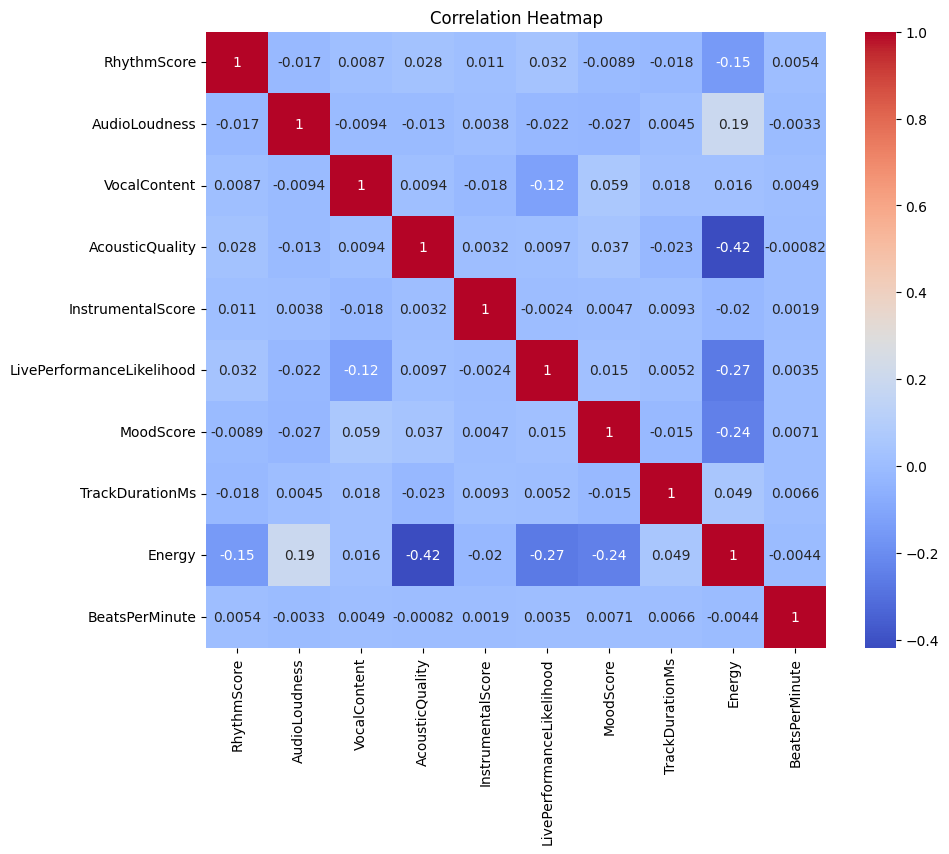

In [11]:
df_without_id = df.drop(columns=['id'])
# correlation plot of data
plt.figure(figsize=(10,8))
sns.heatmap(df_without_id.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

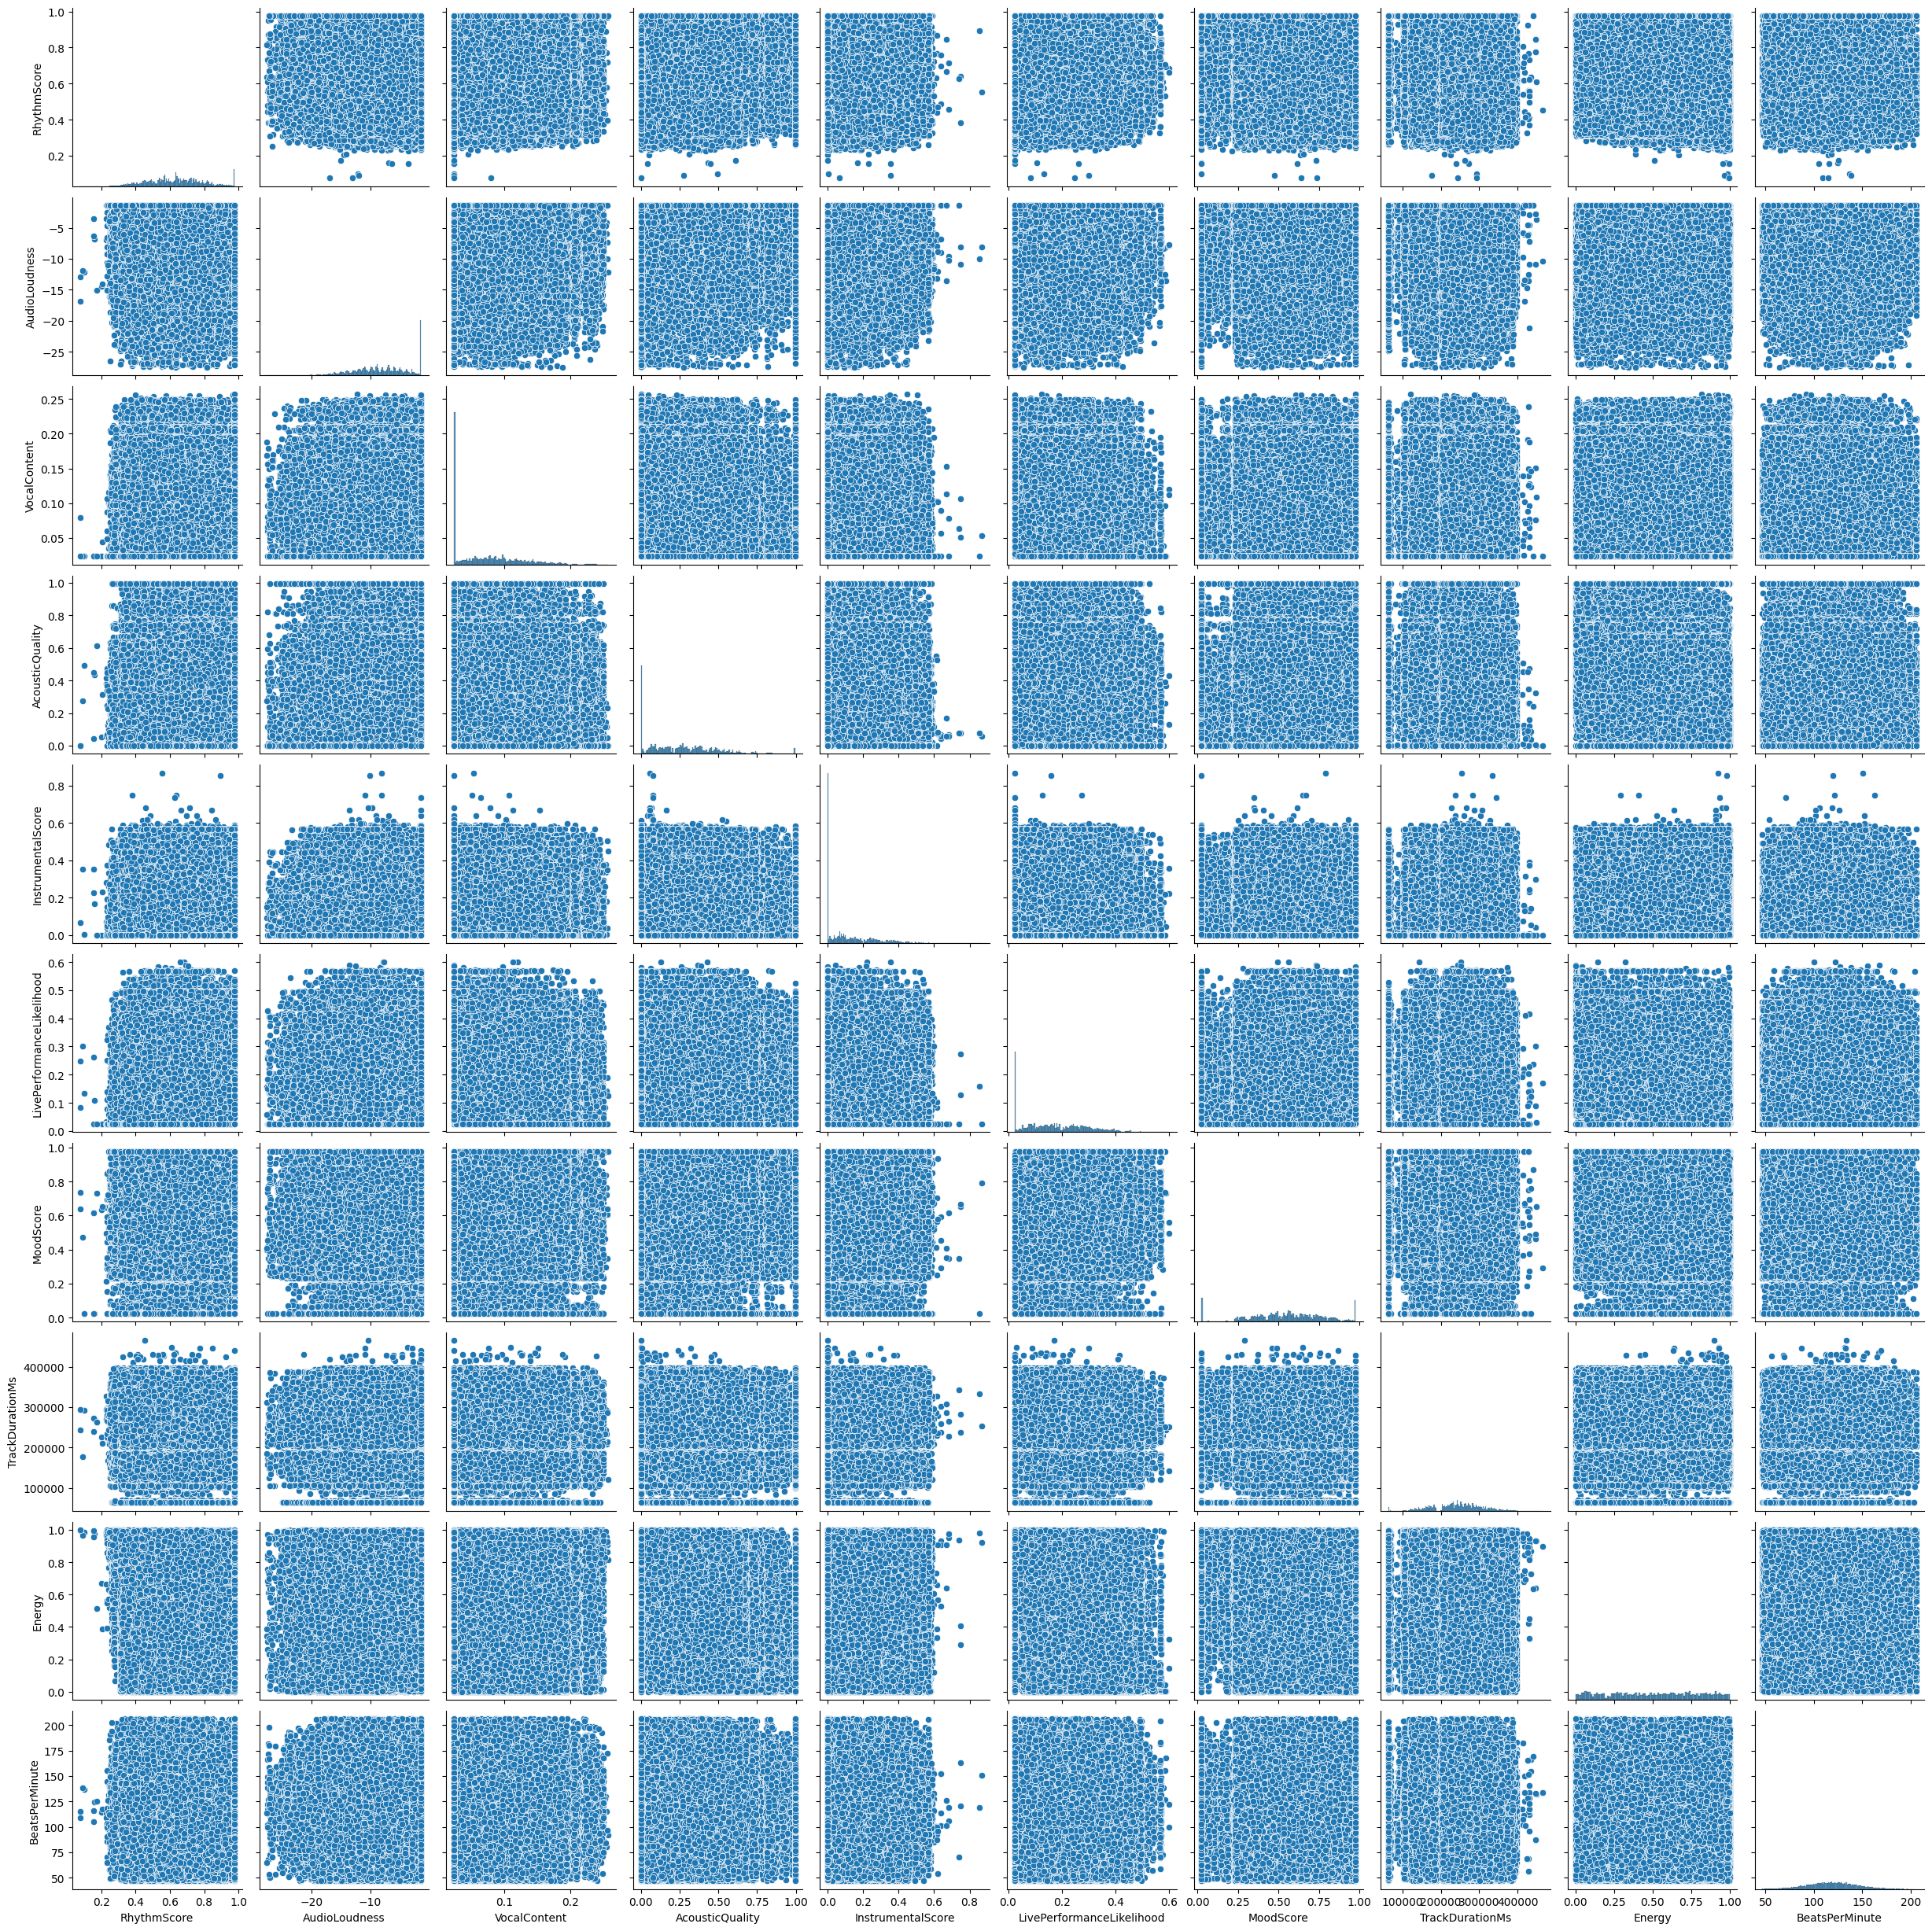

In [12]:
# pair plot
sns.pairplot(df_without_id)
plt.show()

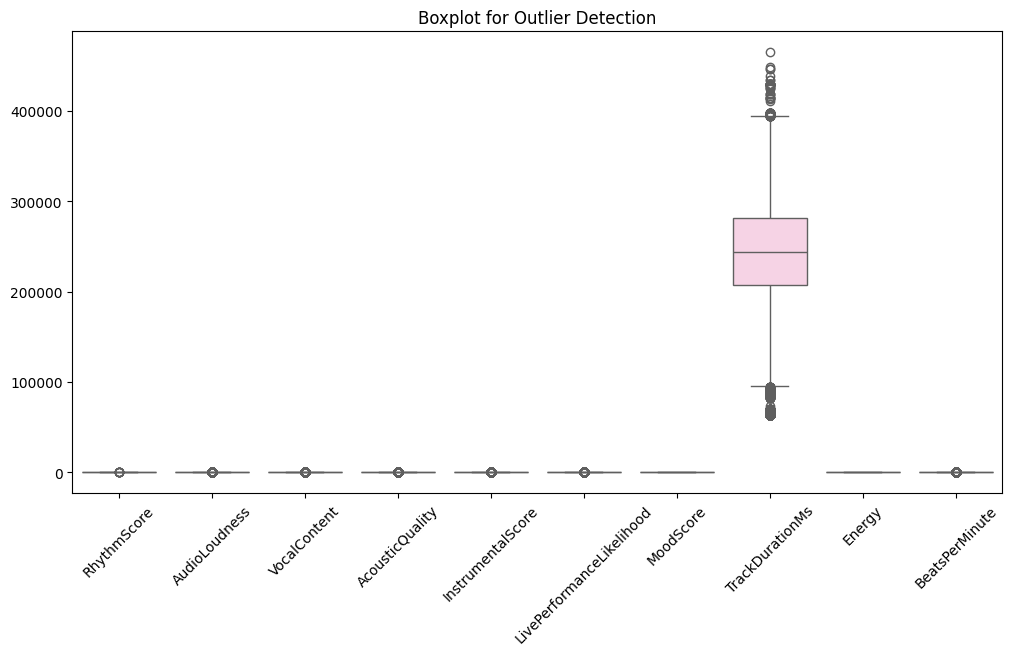

In [14]:
#box plot for outlier detection
plt.figure(figsize=(12,6))
sns.boxplot(data=df_without_id, palette='Set3')
plt.title('Boxplot for Outlier Detection')
plt.xticks(rotation=45)
plt.show()

We need to standardize the data so that range can be easier to interpret.

In [23]:
# remove beats_per_minute column as it is the target variable and we donnott want to scale it
df_without_bpm = df_without_id.drop(columns=['BeatsPerMinute'])

# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_without_bpm)
scaled_df = pd.DataFrame(scaled_data, columns=df_without_bpm.columns)
print(scaled_df.head())

   RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0    -0.186320       0.160753     -1.020114        -1.178322   
1     0.042116      -1.708885     -0.058541         0.815779   
2    -0.754022      -1.640859      0.726325        -0.399847   
3     0.647674       1.521162     -0.430095        -1.170947   
4    -0.636554      -1.013259     -1.020114        -0.870498   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0          -0.892636                  -1.074691  -0.647405         0.822767   
1           1.757555                  -0.066641   0.422064        -1.304377   
2           2.549397                  -1.259230  -0.585321        -1.136222   
3           0.318762                  -0.778712  -1.228925        -0.275361   
4          -0.892636                   1.294126  -0.346257        -0.471004   

     Energy  
0  1.122062  
1 -1.226143  
2  0.426774  
3 -0.046407  
4  1.539602  


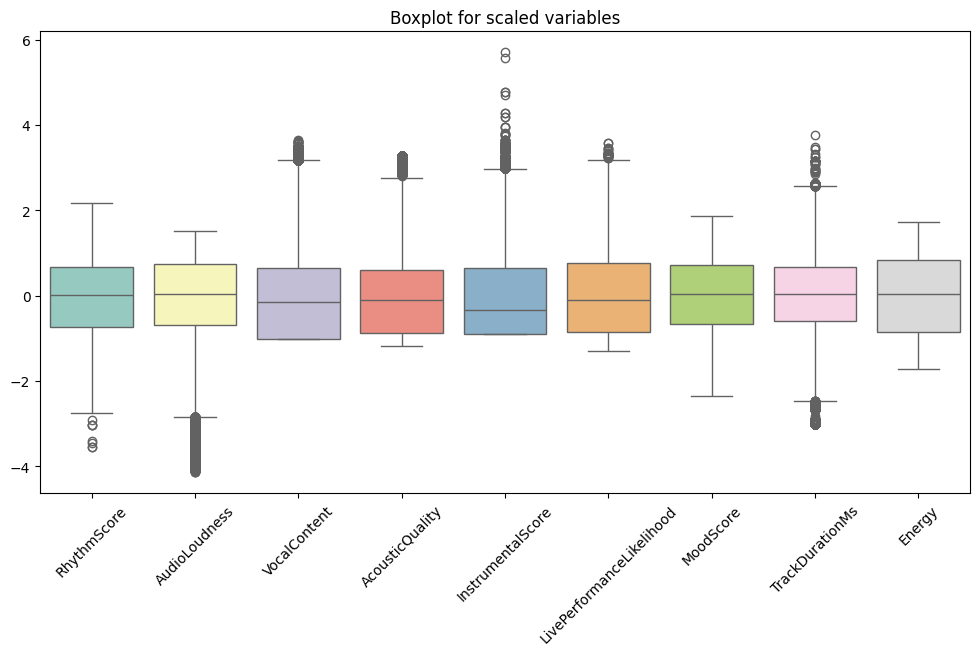

In [24]:
#box plot for scaled dataframe
plt.figure(figsize=(12,6))
sns.boxplot(data=scaled_df, palette='Set3')
plt.title('Boxplot for scaled variables')
plt.xticks(rotation=45)
plt.show()

In [25]:
# now adding id column back to scaled_df and BeatsPerMinute column back to scaled_df
scaled_df['BeatsPerMinute'] = df['BeatsPerMinute']
scaled_df['id'] = df['id']
scaled_df = scaled_df[['id'] + list(scaled_df.columns[:-1])]
print(scaled_df.head())

   id  RhythmScore  AudioLoudness  VocalContent  AcousticQuality  \
0   0    -0.186320       0.160753     -1.020114        -1.178322   
1   1     0.042116      -1.708885     -0.058541         0.815779   
2   2    -0.754022      -1.640859      0.726325        -0.399847   
3   3     0.647674       1.521162     -0.430095        -1.170947   
4   4    -0.636554      -1.013259     -1.020114        -0.870498   

   InstrumentalScore  LivePerformanceLikelihood  MoodScore  TrackDurationMs  \
0          -0.892636                  -1.074691  -0.647405         0.822767   
1           1.757555                  -0.066641   0.422064        -1.304377   
2           2.549397                  -1.259230  -0.585321        -1.136222   
3           0.318762                  -0.778712  -1.228925        -0.275361   
4          -0.892636                   1.294126  -0.346257        -0.471004   

     Energy  BeatsPerMinute  
0  1.122062       147.53020  
1 -1.226143       136.15963  
2  0.426774        55.3198

In [26]:
# create train  and validation sets
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(scaled_df, test_size=0.2, random_state=42)

# splot data into x-train, y-train, x-val, y-val
X_train = train_df.drop(columns=['BeatsPerMinute'])
y_train = train_df['BeatsPerMinute']
X_val = val_df.drop(columns=['BeatsPerMinute'])
y_val = val_df['BeatsPerMinute']

print(X_train.shape, y_train.shape, X_val.shape, y_val.shape)

(419331, 10) (419331,) (104833, 10) (104833,)


# Modeling and comparison

In [ ]:
# === RMSE comparison with 5-fold CV, then holdout eval on X_val ===
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import Ridge, HuberRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, HistGradientBoostingRegressor
from sklearn.dummy import DummyRegressor
from xgboost import XGBRegressor

cv = KFold(n_splits=5, shuffle=True, random_state=42)
scoring = "neg_root_mean_squared_error"  # sklearn returns negative; we'll negate

models = {
    "DummyMean": DummyRegressor(strategy="mean"),
    "Ridge":     Ridge(alpha=1.0, random_state=42),
    "Huber":     HuberRegressor(),                  # robust to outliers
    "SVR":       SVR(C=10, epsilon=1.0, kernel="rbf"),
    "kNN":       KNeighborsRegressor(n_neighbors=15),
    "RF":        RandomForestRegressor(n_estimators=500, random_state=42, n_jobs=-1),
    "HGB":       HistGradientBoostingRegressor(random_state=42),
    "XGB":   XGBRegressor(objective="reg:squarederror",
                        n_estimators=1000,
                        learning_rate=0.05,
                        max_depth=6,
                        subsample=0.8,
                        colsample_bytree=0.8,
                        reg_lambda=1.0,
                        reg_alpha=0.0,
                        random_state=42,
                        n_jobs=-1,
                        tree_method="hist")  # set to "gpu_hist" if you have GPU
}

rows = []
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=cv, scoring=scoring, n_jobs=-1)
    rmse = -scores  # make positive
    rows.append((name, rmse.mean(), rmse.std()))
cv_table = pd.DataFrame(rows, columns=["model", "rmse_mean_cv", "rmse_std_cv"]).sort_values("rmse_mean_cv")
print("=== 5-fold CV RMSE (lower is better) ===")
print(cv_table)

# Pick the best by CV RMSE
best_name = cv_table.iloc[0]["model"]
best_model = models[best_name]
print(f"\nBest by CV: {best_name}")

# Fit best on training data
best_model.fit(X_train, y_train)

# Holdout evaluation on your validation split
y_pred_val = best_model.predict(X_val)
rmse_val = root_mean_squared_error(y_val, y_pred_val, squared=False)
print(f"\nHoldout RMSE on X_val: {rmse_val:.4f}")

# Optional: show simple feature importances for tree models
def show_feature_importance(model, feature_names):
    if hasattr(model, "feature_importances_"):
        imp = pd.Series(model.feature_importances_, index=feature_names).sort_values(ascending=False)
        print("\nTop 15 feature importances:")
        print(imp.head(15))
    elif best_name == "XGB" and hasattr(model, "get_booster"):
        try:
            booster = model.get_booster()
            score = booster.get_score(importance_type="gain")
            imp = pd.Series(score).sort_values(ascending=False)
            print("\nTop 15 XGB (gain) importances:")
            print(imp.head(15))
        except Exception:
            pass

if hasattr(X_train, "columns"):
    show_feature_importance(best_model, X_train.columns)


/opt/homebrew/Cellar/python@3.10/3.10.18/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.10/3.10.18/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)
/opt/homebrew/Cellar/python@3.10/3.10.18/Frameworks/Python.framework/Versions/3.10/lib/python3.10/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See h